In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
        

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\sachk\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [32]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [40]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

# Input layer
model.add(Input(shape=(48, 48, 1)))

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))


In [44]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics =['accuracy'])

In [46]:
model.fit(x = x_train, y =y_train, batch_size = 128, epochs =100, validation_data = (x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.2365 - loss: 1.8382 - val_accuracy: 0.2583 - val_loss: 1.8117
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.2514 - loss: 1.8062 - val_accuracy: 0.2605 - val_loss: 1.7759
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.2746 - loss: 1.7492 - val_accuracy: 0.3480 - val_loss: 1.6230
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.3518 - loss: 1.6404 - val_accuracy: 0.3858 - val_loss: 1.5599
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.3956 - loss: 1.5443 - val_accuracy: 0.4445 - val_loss: 1.4038
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.4365 - loss: 1.4654 - val_accuracy: 0.4892 - val_loss: 1.3390
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.4518 - loss: 1.4194 - val_accuracy: 0.4938 - val_loss: 1.3087
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.4681 - loss: 1.3887 - 

In [52]:
# Save the model architecture as JSON
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save the model weights and architecture in the new .keras format
model.save("emotiondetector.keras")

In [54]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [64]:
from keras.preprocessing.image import load_img
import numpy as np
def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [72]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  sad


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
model prediction is  happy


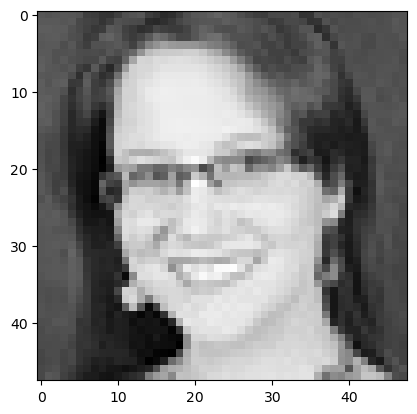

In [78]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')